In [1]:
%matplotlib inline

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Reshape, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

# MNIST

## Demo

In [5]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
len(mnist.load_data())

2

In [11]:
((train_images, train_classes), (test_images, test_classes)) = mnist.load_data()

In [13]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

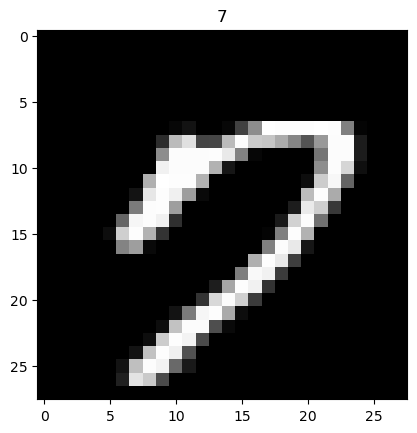

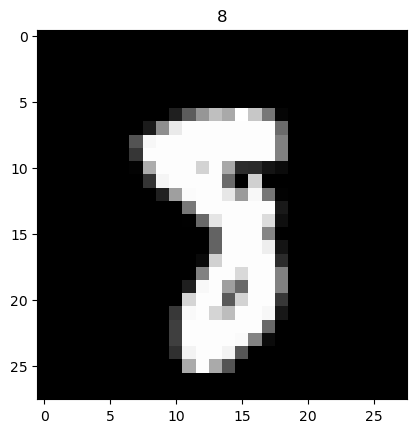

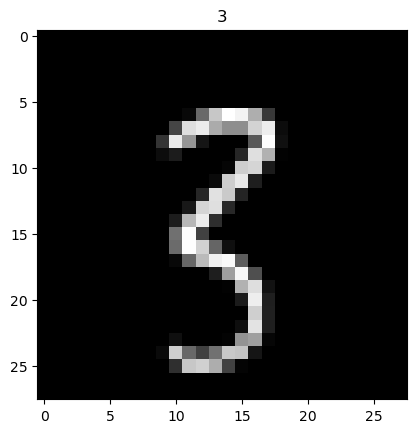

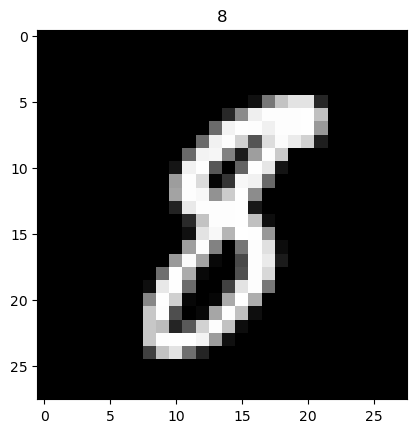

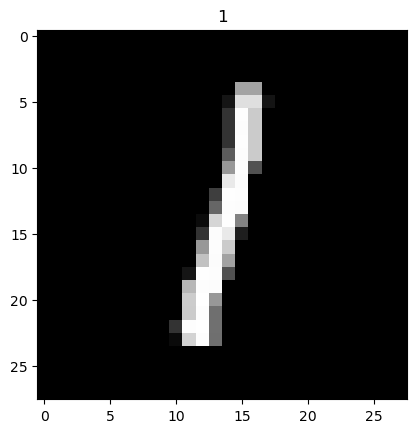

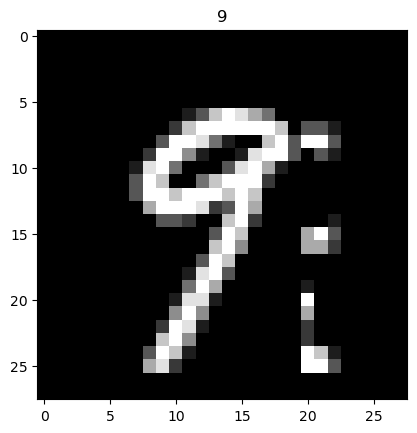

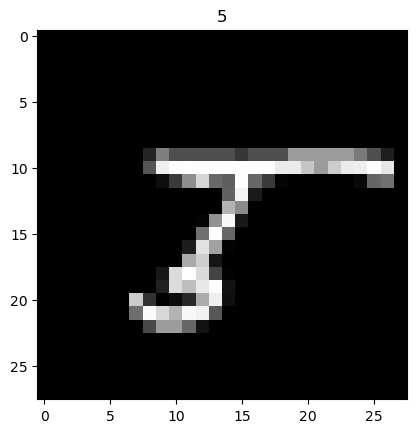

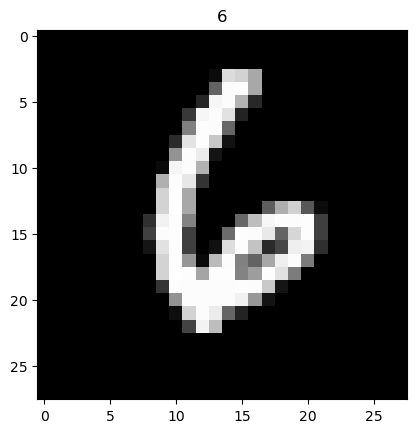

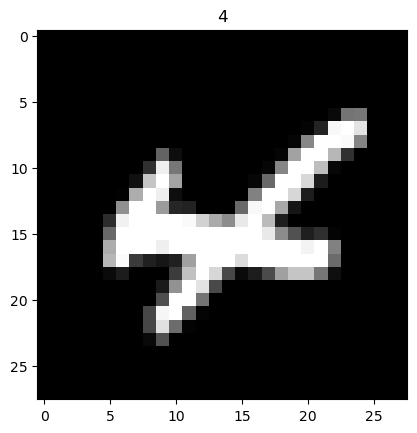

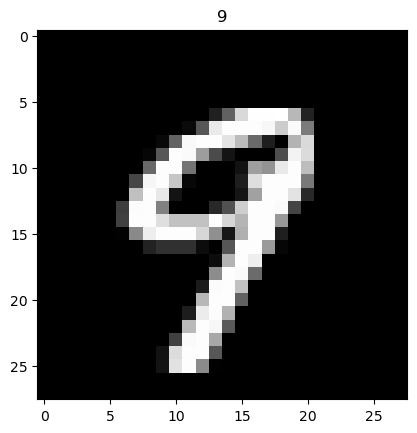

In [20]:
for i in np.random.choice(range(len(train_images)), 10):
    plt.imshow(train_images[i], cmap = "gray")
    plt.title(train_classes[i])
    plt.show()

In [24]:
input_shape = train_images[0].shape
num_classes = len(set(train_classes))

In [31]:
train_images.reshape(60000, -1).shape

(60000, 784)

In [32]:
train_images.reshape(60000, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [43]:
model = Sequential([
    Input(input_shape),
    Flatten(),
    
    Dense(64, activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(16, activation = "relu"),
    
    Dense(num_classes, activation = "softmax")
])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [46]:
model.fit(train_images, train_classes, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1948 - accuracy: 0.6962
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5309 - accuracy: 0.8748
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4004 - accuracy: 0.9109
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3302 - accuracy: 0.9258
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2822 - accuracy: 0.9361
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2632 - accuracy: 0.9416
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2594 - accuracy: 0.9442
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2458 - accuracy: 0.9486
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2442 - accuracy: 0.9479
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.235

In [81]:
tf.keras.backend.clear_session()

In [82]:
conv_model = Sequential([
    Input(input_shape), 
    Reshape((28, 28, 1)),
    Conv2D(64, kernel_size = 5, activation = "relu"),
    MaxPooling2D(),
    Conv2D(32, kernel_size = 3, activation = "relu"),
    MaxPooling2D(),
    Conv2D(16, kernel_size = 3, activation = "relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(num_classes, activation = "softmax")
])

In [83]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          4

In [84]:
conv_model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [85]:
conv_model.fit(train_images, train_classes, epochs = 10, callbacks = [TensorBoard()], validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 28s 16ms/step - loss: 0.4297 - accuracy: 0.8951 - val_loss: 0.1217 - val_accuracy: 0.9673
Epoch 2/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.1263 - accuracy: 0.9663 - val_loss: 0.0793 - val_accuracy: 0.9782
Epoch 3/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.1009 - accuracy: 0.9738 - val_loss: 0.0881 - val_accuracy: 0.9813
Epoch 4/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0921 - accuracy: 0.9770 - val_loss: 0.0847 - val_accuracy: 0.9813
Epoch 5/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0850 - accuracy: 0.9790 - val_loss: 0.0942 - val_accuracy: 0.9800
Epoch 6/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0825 - accuracy: 0.9812 - val_loss: 0.0926 - val_accuracy: 0.9788
Epoch 7/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0794 - accuracy: 0.9822 - val_loss: 0.0975 -